In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

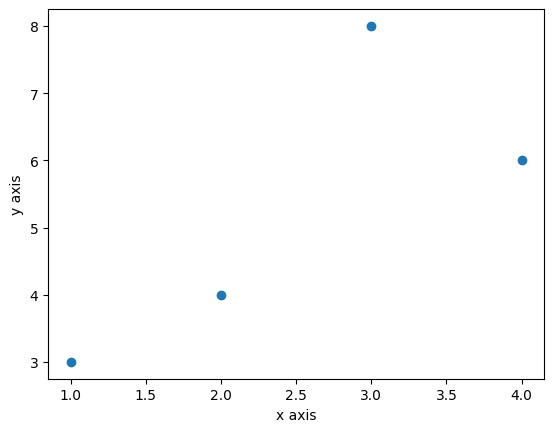

In [2]:
# Scatter plot
x = [1,2,3,4]
y = [3,4,8,6]

plt.scatter(x,y)
plt.ylabel('y axis')
plt.xlabel('x axis')
plt.show()

# Exercise 1: draw a scatter plot with y-errors, e.g. 10% of the y-value
# Exercise 2 - tricky: draw a histogram where the y-values are the bin contents

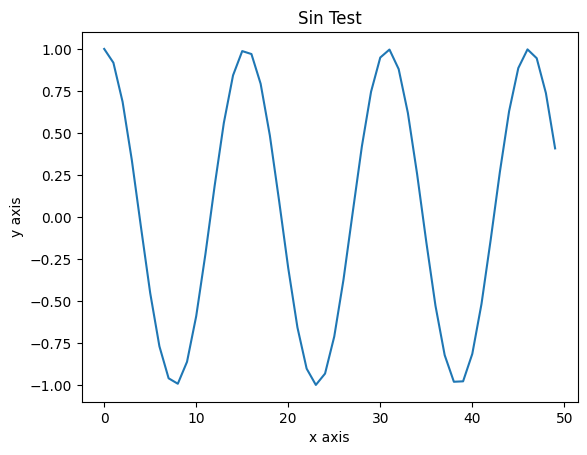

In [3]:
# Plot a function
plt.plot(np.cos(np.linspace(0, 20)))
plt.title('Sin Test')
plt.ylabel('y axis')
plt.xlabel('x axis')
plt.show()

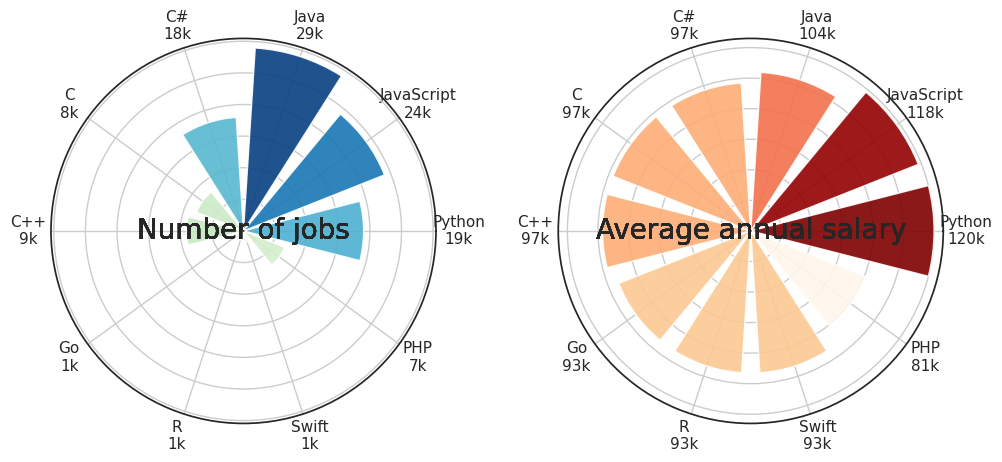

In [5]:
# More complex graphics using the seaborn library
import seaborn as sns
sns.set(style='ticks')

import matplotlib.cm as cm
import matplotlib as mpl

# Data taken from 
# https://www.northeastern.edu/graduate/blog/most-popular-programming-languages/
import pandas as pd
lang_data = pd.read_csv('../data/lang_data.csv')

# Exercise 3: show the raw data

fig = plt.figure(1, figsize=(12, 5))
N = len(lang_data)


def show(ax, what, data, n, cmap):
    angles = np.arange(0, 360., 360./n)
    bars = ax.bar([np.deg2rad(angle) for angle in angles], 
                  [k for k in data[what]], width=0.5)
    norm = mpl.colors.Normalize(vmin=min(data[what]), vmax=max(data[what]))
    m = cm.ScalarMappable(norm=norm, cmap=cmap)
    for index, bar in enumerate(bars):
        bar.set_facecolor(m.to_rgba(data.loc[index, what]))
        bar.set_alpha(0.9)
        ax.set_yticklabels([])
        ax.yaxis.grid(True)
        l, text = ax.set_thetagrids(
                    angles, 
                    labels=['{}\n{:d}k'.format(row['Language'], int(0.001*row[what])) 
                            for index, row in data.iterrows()])
        ax.text(0.5, 0.5, what, size=20, ha='center', va='center')
        ax.set_rorigin(-1)

ax = fig.add_subplot(1, 2, 1, projection='polar')
show(ax=ax, data=lang_data, what='Number of jobs', n=N, cmap=cm.GnBu)
ax = fig.add_subplot(1, 2, 2, projection='polar')
show(ax=ax, data=lang_data, what='Average annual salary', n=N, cmap=cm.OrRd)

In [ ]:
# And now trying to add widgets to speed-up/simplify certain tasks
from ipywidgets import interact, FloatSlider
import matplotlib.transforms as transforms

x_widget = FloatSlider(min=-10.0, max=10.0, step=0.1, value=0)
y_widget = FloatSlider(min=0.1, max=5.0, step=0.05, value=1)

def gauss_plot(x, y):
    fig = plt.figure(1, figsize=(6, 6))
    data = np.random.normal(x, y, 10000)
    ax = plt.axes()
    ax.hist(data, 50, histtype='stepfilled', facecolor='coral', density=True)
    # Exercise 4: what are the arguments in the hist function?
    ax.axvline(data.mean(), color='k', ymax=0.8, linestyle='dashed', linewidth=1)
    shift = 0.01*(ax.get_xlim()[1] - ax.get_xlim()[0])
    trans = transforms.blended_transform_factory(ax.transData, ax.transAxes)
    ax.text(data.mean()+shift, 0.1, 'mean', rotation=270, 
             transform=trans, horizontalalignment='left')
    for p in [0.05, 0.95]:
        ax.axvline(np.quantile(data, p), color='k', ymax=0.5, linestyle='dashed', linewidth=1)
        ax.text(np.quantile(data, p)+shift, 0.1, '{:d}%'.format(int(p*100)), 
                rotation=270, transform=trans, horizontalalignment='left')
        
    ax.text(np.quantile(data, 0.001), 0.9*max(ax.get_ylim()), '$\mu = {}$'.format(x))
    ax.text(np.quantile(data, 0.001), 0.8*max(ax.get_ylim()), '$\sigma = {}$'.format(y))
    

interact(gauss_plot, x=x_widget, y=y_widget)

# Exercise 5 - bonus : draw a gaussian distribution over the histogram

interactive(children=(FloatSlider(value=0.0, description='x', max=10.0, min=-10.0), FloatSlider(value=1.0, des…

<function __main__.gauss_plot(x, y)>